In [1]:
import util

In [2]:
# EC2-Dynamo data
df_ec2_dynamo_constant_run1 = util.trim_df(util.to_df_ec2('./target-dynamo/ec2-dynamo-constant-1725388473-run1.log'))
df_ec2_dynamo_constant_run2 = util.trim_df(util.to_df_ec2('./target-dynamo/ec2-dynamo-constant-1725440892-run2.log'))
df_ec2_dynamo_spiky_run1 = util.trim_df(util.to_df_ec2('./target-dynamo/ec2-dynamo-spiky-1725302112-run1.log'))
df_ec2_dynamo_spiky_run2 = util.trim_df(util.to_df_ec2('./target-dynamo/ec2-dynamo-spiky-1725355887-run2.log'))

# Lambda-Dynamo data
df_lambda_dynamo_constant_run1 = util.trim_df(util.to_df_lambda('./target-dynamo/lambda-dynamo-constant-1725766991-run1.log'))
df_lambda_dynamo_constant_run2 = util.trim_df(util.to_df_lambda('./target-dynamo/lambda-dynamo-constant-1725821620-run2.log'))
df_lambda_dynamo_spiky_run1 = util.trim_df(util.to_df_lambda('./target-dynamo/lambda-dynamo-spiky-1725676459-run1.log'))
df_lambda_dynamo_spiky_run2 = util.trim_df(util.to_df_lambda('./target-dynamo/lambda-dynamo-spiky-1725729192-run2.log'))

In [3]:
print('\n----------> df_ec2_dynamo_constant_run1 <----------');util.summary(df_ec2_dynamo_constant_run1,'latency')
print('\n----------> df_ec2_dynamo_constant_run2 <----------');util.summary(df_ec2_dynamo_constant_run2,'latency')
print('\n----------> df_ec2_dynamo_spiky_run1 <----------');util.summary(df_ec2_dynamo_spiky_run1,'latency')
print('\n----------> df_ec2_dynamo_spiky_run2 <----------');util.summary(df_ec2_dynamo_spiky_run2,'latency')
print('\n----------> df_lambda_dynamo_constant_run1 <----------');util.summary(df_lambda_dynamo_constant_run1,'latency')
print('\n----------> df_lambda_dynamo_constant_run2 <----------');util.summary(df_lambda_dynamo_constant_run2,'latency')
print('\n----------> df_lambda_dynamo_spiky_run1 <----------');util.summary(df_lambda_dynamo_spiky_run1,'latency')
print('\n----------> df_lambda_dynamo_spiky_run2 <----------');util.summary(df_lambda_dynamo_spiky_run2,'latency')


----------> df_ec2_dynamo_constant_run1 <----------
Mean: 3.2101817042606515
Max: 68
Min: 1
Standard Deviation: 1.5330902580706174
Variance: 2.350365739391032
Quantiles:
0.25    3.0
0.50    3.0
0.75    3.0
Name: latency, dtype: float64

----------> df_ec2_dynamo_constant_run2 <----------
Mean: 2.99499791144528
Max: 78
Min: 2
Standard Deviation: 1.2379837501757132
Variance: 1.5326037656991227
Quantiles:
0.25    3.0
0.50    3.0
0.75    3.0
Name: latency, dtype: float64

----------> df_ec2_dynamo_spiky_run1 <----------
Mean: 3.1617471293806294
Max: 39
Min: 2
Standard Deviation: 1.1037960608105772
Variance: 1.2183657438609476
Quantiles:
0.25    3.0
0.50    3.0
0.75    3.0
Name: latency, dtype: float64

----------> df_ec2_dynamo_spiky_run2 <----------
Mean: 2.775291330516071
Max: 100
Min: 1
Standard Deviation: 1.552477409559439
Variance: 2.410186107192386
Quantiles:
0.25    2.0
0.50    3.0
0.75    3.0
Name: latency, dtype: float64

----------> df_lambda_dynamo_constant_run1 <----------
Mea

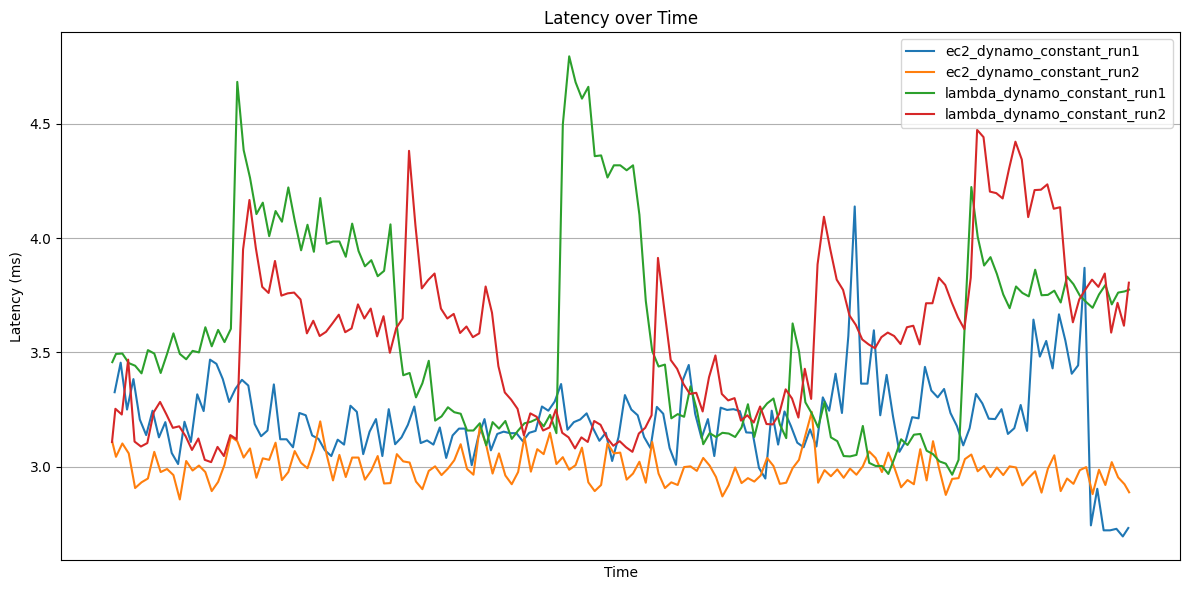

In [4]:
util.plot_multiple([df_ec2_dynamo_constant_run1,df_ec2_dynamo_constant_run2,df_lambda_dynamo_constant_run1,df_lambda_dynamo_constant_run2],['ec2_dynamo_constant_run1','ec2_dynamo_constant_run2','lambda_dynamo_constant_run1','lambda_dynamo_constant_run2'])

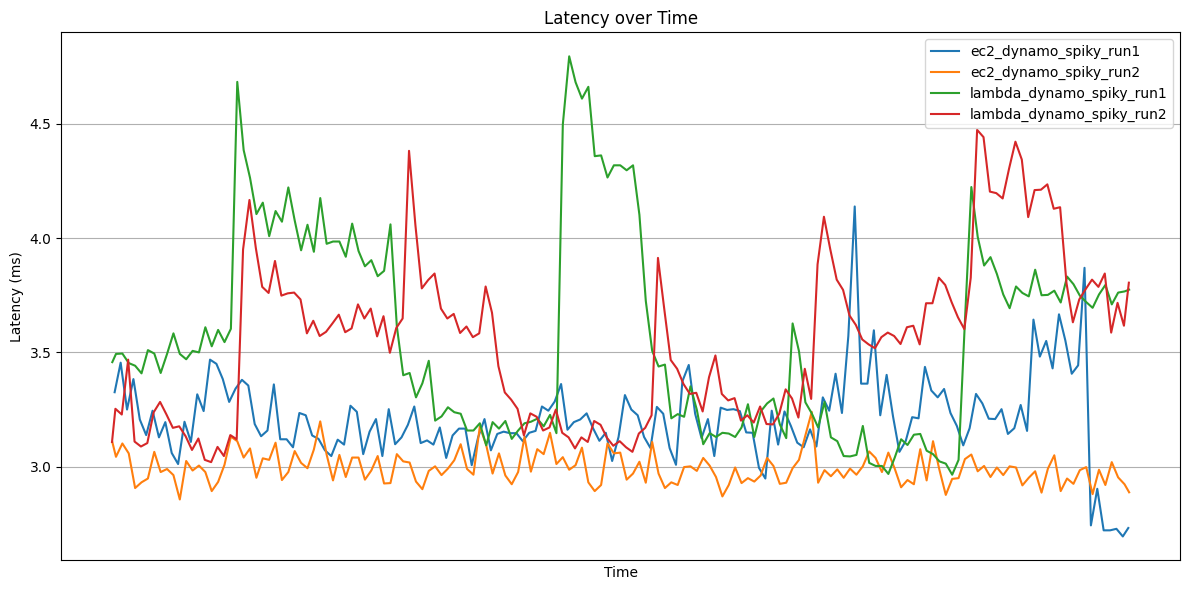

In [5]:
util.plot_multiple([df_ec2_dynamo_constant_run1,df_ec2_dynamo_constant_run2,df_lambda_dynamo_constant_run1,df_lambda_dynamo_constant_run2],['ec2_dynamo_spiky_run1','ec2_dynamo_spiky_run2','lambda_dynamo_spiky_run1','lambda_dynamo_spiky_run2'])